In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Job Title,Location,Job Description,Rating,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,job_simp,employee_expriece,desc_len,python,excel,sql,tableau,spark,machine learning,aws
0,Business Analyst,"Plano, TX","Hello,\r\nWe are hiring for Business System An...",5.0,Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,...,business analyst,junior_emp,1459,0,1,1,0,0,0,0
1,Business Systems Analyst,"Irvine, CA",-1,5.0,-1,-1,-1,-1,-1,-1,...,na,junior_emp,2,0,0,0,0,0,0,0
2,Business/Database Analyst,"Newark, NJ",JSR has an immediate opening for their direct ...,5.0,51 to 200 Employees,2015,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),...,na,junior_emp,4188,0,1,1,0,0,0,1
3,Data Analyst,"New York, NY",Are you someone who loves crunching numbers an...,3.5,201 to 500 Employees,1972,Nonprofit Organization,Education & Training Services,Education,$5 to $25 million (USD),...,data analyst,junior_emp,3518,0,1,0,0,0,0,0
4,Junior Business/Data Analyst,"Washington, DC","Company Overview:\r\nThe Kenific Group, Inc. (...",2.6,51 to 200 Employees,-1,Company - Private,Business Consulting,Management & Consulting,Less than $1 million (USD),...,data analyst,junior_emp,3353,0,1,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          563 non-null    object 
 1   Location           563 non-null    object 
 2   Job Description    563 non-null    object 
 3   Rating             563 non-null    float64
 4   Size               563 non-null    object 
 5   Founded            563 non-null    int64  
 6   Type of ownership  563 non-null    object 
 7   Industry           563 non-null    object 
 8   Sector             563 non-null    object 
 9   Revenue            563 non-null    object 
 10  hourly             563 non-null    int64  
 11  employer_est       563 non-null    int64  
 12  glassdoor_est      563 non-null    int64  
 13  min_salary         563 non-null    float64
 14  max_salary         563 non-null    float64
 15  avg_salary         563 non-null    float64
 16  age                563 non

In [5]:
df.columns

Index(['Job Title', 'Location', 'Job Description', 'Rating', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_est', 'glassdoor_est', 'min_salary', 'max_salary',
       'avg_salary', 'age', 'company_txt', 'State', 'job_simp',
       'employee_expriece', 'desc_len', 'python', 'excel', 'sql', 'tableau',
       'spark', 'machine learning', 'aws'],
      dtype='object')

In [6]:
df.describe()

,Rating,Founded,hourly,employer_est,glassdoor_est,min_salary,max_salary,avg_salary,age,desc_len,python,excel,sql,tableau,spark,machine learning,aws
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,3.670515,1457.793961,0.143872,0.577265,0.422735,98.753428,138.145471,118.449449,36.476021,3984.326821,0.461812,0.490231,0.523979,0.149201,0.177620,0.296625,0.273535
std,1.275076,869.017208,0.351272,0.494433,0.494433,39.176321,58.739585,47.370053,48.582623,2167.914802,0.498983,0.500349,0.499869,0.356603,0.382532,0.457176,0.446169
min,-1.000000,-1.000000,0.000000,0.000000,0.000000,4.000000,6.000000,5.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.600000,-1.000000,0.000000,0.000000,0.000000,70.000000,98.500000,83.500000,-1.000000,2410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,1971.000000,0.000000,1.000000,0.000000,90.000000,127.000000,109.000000,18.000000,4092.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,2004.000000,0.000000,1.000000,1.000000,120.000000,165.500000,141.250000,50.000000,5391.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,2022.000000,1.000000,1.000000,1.000000,300.000000,520.000000,400.000000,277.000000,13226.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# choose relevant columns 
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly',
             'State','age','python','excel','aws','sql','tableau','spark','machine learning','job_simp','employee_expriece','desc_len']]

In [8]:
# get dummy data
df_dum = pd.get_dummies(df_model)

In [9]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# multiple linear regression
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     4.778
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           6.46e-36
Time:                        15:30:27   Log-Likelihood:                -2698.1
No. Observations:                 563   AIC:                             5684.
Df Residuals:                     419   BIC:                             6308.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 57.1856      5.762      9.924      0.000      45.859      68.512
Rating                                                -0.8592      1.434     -0.599      0.549      -3.678       1.960
hourly                                               -10.3641      5.623     -1.843      0.066     -21.417       0.689
age                                                    0.0236      0.056      0.420      0.675      -0.087       0.134
python                                                -2.5136      4.468     -0.563      0.574     -11.296       6.269
excel                                                 -1.7665      3.738     -0.473      0.637      -9.115       5.582
aws                                                    5.9932      4.114      1.457      0.146      -2.093      14.079
sql                                                   -0.8700      4.134     -0.210      0.833      -8.997       7.257
tableau                                               -6.3953      5.335     -1.199      0.231     -16.882       4.092
spark                                                 20.0901      4.926      4.078      0.000      10.407      29.774
machine learning                                       3.1457      4.916      0.640      0.523      -6.518      12.809
desc_len                                               0.0009      0.001      0.890      0.374      -0.001       0.003
Size_-1                                                8.9862      3.590      2.503      0.013       1.929      16.043
Size_1 to 50 Employees                                -8.7264      6.069     -1.438      0.151     -20.656       3.203
Size_10000+ Employees                                 -4.1893      7.411     -0.565      0.572     -18.757      10.379
Size_1001 to 5000 Employees                           10.7249      5.438      1.972      0.049       0.036      21.414
Size_201 to 500 Employees                             21.9599      5.948      3.692      0.000      10.269      33.651
Size_5001 to 10000 Employees                           3.8144      8.235      0.463      0.643     -12.373      20.002
Size_501 to 1000 Employees                            14.0874      7.908      1.781      0.076      -1.457      29.631
Size_51 to 200 Employees                               1.9917      5.620      0.354      0.723      -9.056      13.039
Size_Unknown                                           8.5367      6.959      1.227      0.221      -5.141      22.215
Type of ownership_-1                                   8.9862      3.590      2.503      0.013       1.929      16.043
Type of ownership_College / University               -17.1388     39.808     -0.431      0.667     -95.388  

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
linear = LinearRegression()
linear.fit(X_train, y_train)

np.mean(cross_val_score(linear,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=5))

-25.8939798662219

In [15]:
# lasso regression 
las = Lasso(alpha=.42)
las.fit(X_train,y_train)
np.mean(cross_val_score(las,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21.623809998762898

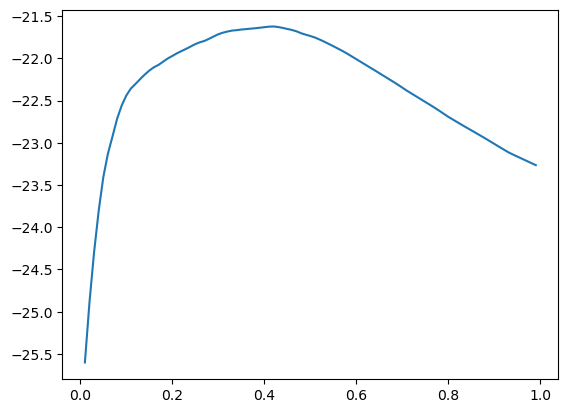

In [13]:
# find alpha with less error
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lass = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lass,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [14]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
41,0.42,-21.62381


In [17]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(criterion='absolute_error', n_estimators=60)

np.mean(cross_val_score(rfr,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-19.84124777777778

In [18]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rfr,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\e

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             n_estimators=60),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [19]:
gs.best_score_

-19.462018431372545

In [20]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=170)

In [21]:
# test ensembles 
tpred_linear = linear.predict(X_test)
tpred_lasso = las.predict(X_test)
tpred_rfr = gs.best_estimator_.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test,tpred_linear)
mae_lasso = mean_absolute_error(y_test,tpred_lasso)
mae_rfr = mean_absolute_error(y_test,tpred_rfr)

In [23]:
models = pd.DataFrame({
    'Model': ['Linear Regression',
              'Lasso Regression',
              'RandomForestRegessor' ],
    'Mae': [mae_linear, mae_lasso, mae_rfr]})

models

,Model,Mae
0,Linear Regression,35.091077
1,Lasso Regression,29.854904
2,RandomForestRegessor,27.381585


In [24]:
mae_las_rfr = mean_absolute_error(y_test,(tpred_lasso+tpred_rfr)/2)

In [25]:
models = pd.DataFrame({
    'Model': ['Linear Regression',
              'Lasso Regression',
              'RandomForestRegessor',
              'Lasso + rfr' ],
    'Mae': [mae_linear, mae_lasso, mae_rfr, mae_las_rfr]})

models

,Model,Mae
0,Linear Regression,35.091077
1,Lasso Regression,29.854904
2,RandomForestRegessor,27.381585
3,Lasso + rfr,27.907545


In [26]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [27]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [28]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

c:\Users\fansy_skkv99a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


130.3029411764706

In [29]:
list(X_test.iloc[1,:])

[4.2,
 0.0,
 47.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4392.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
